In [1]:
import numpy as np
import itertools 
import ezc3d
import matplotlib.pyplot as plt
from pathlib import Path
from math import sqrt
from tqdm import tqdm


# Wczytanie danych

In [29]:

from pyomeca import Analogs

data_path = "file1.c3d"
data_path2= "file2.c3d"
muscles = ["Moment.Mx1","Moment.My1", "Moment.Mz1", "Moment.Mx2","Moment.My2", "Moment.Mz2",
            "Force.Fx1","Force.Fy1","Force.Fz1","Force.Fx2","Force.Fy2","Force.Fz2"]
muscles_names = ["Moment.Mx1","Moment.My1", "Moment.Mz1", "Moment.Mx2",
                 "Moment.My2", "Moment.Mz2","Force.Fx1","Force.Fy1","Force.Fz1","Force.Fx2","Force.Fy2","Force.Fz2"]
muscles_names2 = [["Moment.Mx1"],["Moment.My1"], ["Moment.Mz1"], ["Moment.Mx2"],["Moment.My2"], ["Moment.Mz2"],
                 ["Force.Fx1"],["Force.Fy1"],["Force.Fz1"],["Force.Fx2"],["Force.Fy2"],["Force.Fz2"]]

emg = Analogs.from_c3d(data_path, usecols=muscles)
# emg.plot(x="time", col="channel", col_wrap=3)
emg2 = Analogs.from_c3d(data_path2, usecols=muscles)
# emg2.plot(x="time", col="channel", col_wrap=3)

# Lekka normalizacja

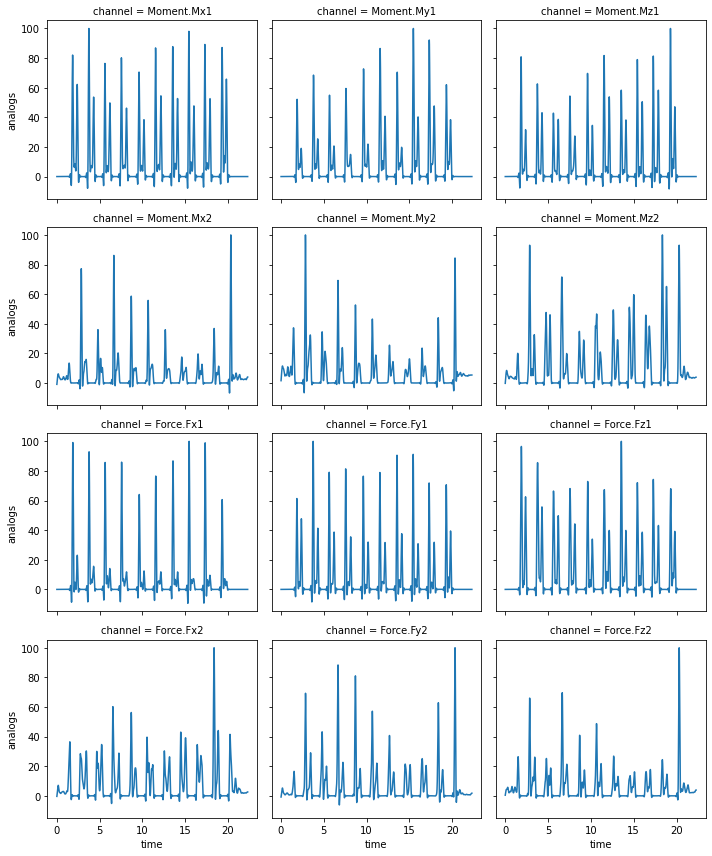

In [49]:
emg_processed = (
    emg.meca.band_pass(order=2, cutoff=[10, 425])
    .meca.center()
    .meca.abs()
    .meca.low_pass(order=4, cutoff=5, freq=emg.rate)
    .meca.normalize(ref=None, scale=100)
)

emg_processed.plot(x="time", col="channel", col_wrap=3)


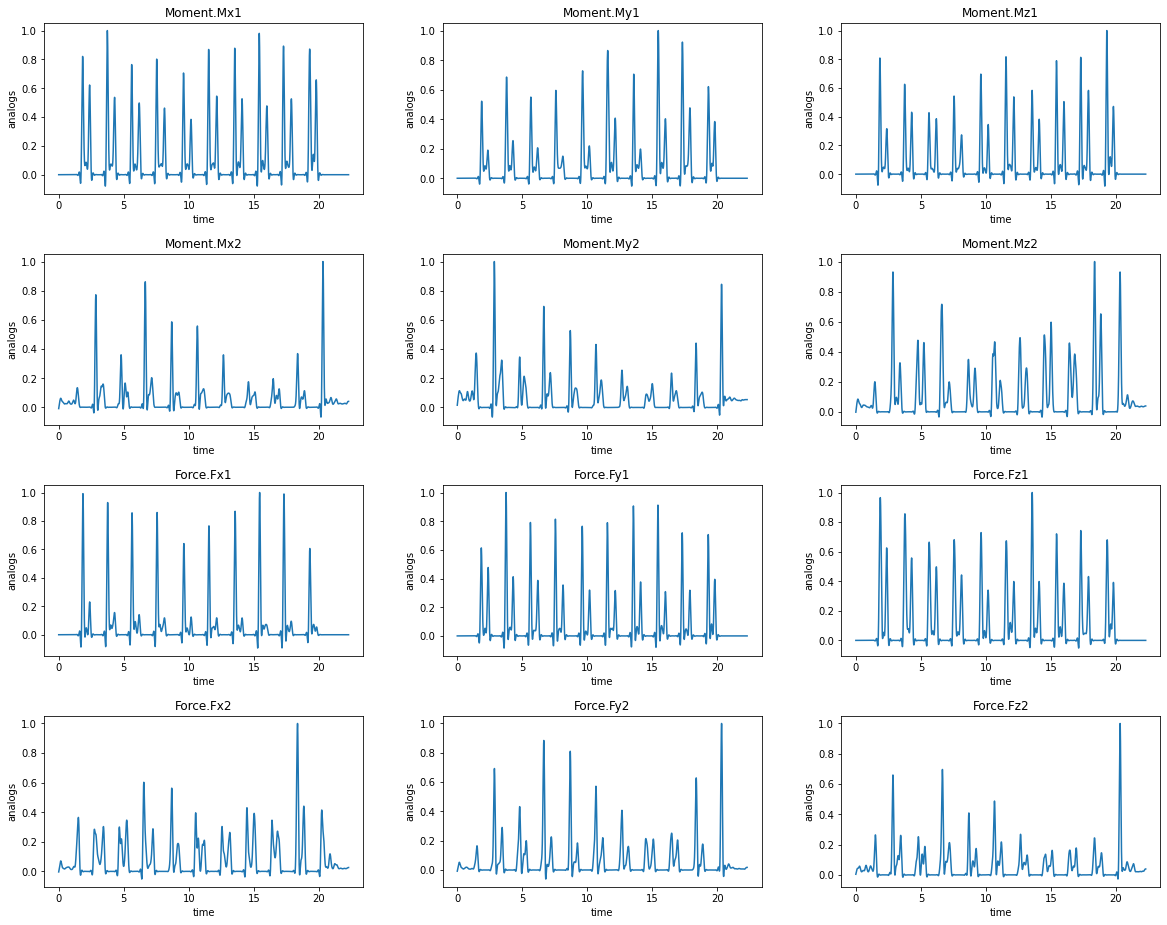

In [7]:

import sys
from matplotlib.pyplot import subplot
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from matplotlib import scale as mscale



muscles = [["Moment.Mx1"],["Moment.My1"],["Moment.Mz1"],["Moment.Mx2"],["Moment.My2"],["Moment.Mz2"],
           ["Force.Fx1"],["Force.Fy1"],["Force.Fz1"],["Force.Fx2"],["Force.Fy2"],["Force.Fz2"]]
muscles_names = [["Moment.Mx1"],["Moment.My1"],["Moment.Mz1"],["Moment.Mx2"],["Moment.My2"],["Moment.Mz2"],
           ["Force.Fx1"],["Force.Fy1"],["Force.Fz1"],["Force.Fx2"],["Force.Fy2"],["Force.Fz2"]]
muscles_names2 = ["Moment.Mx1","Moment.My1", "Moment.Mz1", "Moment.Mx2",
                 "Moment.My2", "Moment.Mz2","Force.Fx1","Force.Fy1","Force.Fz1","Force.Fx2","Force.Fy2","Force.Fz2"]


max_val=[0,0,0,0,0,0,0,0,0,0,0,0]


emg_processed=[[]]

plt.figure(figsize=(20,15))


for i in range(0,12): 
    emg_processed.append([])
    
    emg_norm_value=[]
    emg=Analogs.from_c3d(data_path, usecols=muscles[i])
    
    emg_p = (
    emg.meca.band_pass(order=2, cutoff=[10, 425])
    .meca.center()
    .meca.abs()
    .meca.low_pass(order=4, cutoff=5, freq=emg.rate)
    )
    emg_p['channel'] = muscles_names[i]
    subplot(4, 3, i+1)
    for j in range(emg_p.shape[1]):
        if emg_p[0][j].values>max_val[i]:
            max_val[i]=emg_p[0][j].values
    for k in range(emg_p.shape[1]):
        emg_norm_value.append(emg_p[0][k].values/max_val[i])
    emg_processed[i].append(emg_p.time.values)
    emg_processed[i].append(emg_norm_value)
    
    plt.plot(emg_p.time.values,emg_norm_value)
    plt.xlabel("time")
    plt.ylabel("analogs");
    plt.title(muscles_names2[i])
    
    #plt.show()
    
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.35)

In [5]:
emg_p.shape

(1, 22285)

In [8]:
for i in range(0,12): 
    emg_processed.append([])
    
    emg_norm_value=[]
    emg=Analogs.from_c3d(data_path, usecols=muscles[i])
    
    emg_p = (
    emg.meca.band_pass(order=2, cutoff=[10, 425])
    .meca.center()
    .meca.abs()
    .meca.low_pass(order=4, cutoff=5, freq=emg.rate)
    )

In [ ]:
for i in range(0,1): 
    for j in range(emg_p.shape[1]):
        if emg_p[0][j].values>max_val[i]:
            max_val[i]=emg_p[0][j].values
    for k in range(emg_p.shape[1]):
        emg_norm_value.append(emg_p[0][k].values/max_val[i])
        emg_processed[i].append(emg_p.time.values)
        emg_processed[i].append(emg_norm_value)
    

In [ ]:
print(mata_processed[1][0])


In [ ]:
import data_procesing as dp
import numpy as np
import importlib

In [ ]:
importlib.reload(dp)
data_path = 'file.c3d'
eventy = dp.read_labels(data_path)
print(eventy[1])

print(eventy[0][15])
print(eventy[0][:])
eventy[0].index('Foot Strike')


indxE = [i for i, x in enumerate(eventy[0]) if x == "Event"]
print(indxE)
indxFS = [i for i, x in enumerate(eventy[0]) if x == "Foot Strike"]
print(indxFS)

CzasFS = np.zeros(len(indxFS))
for i in range(len(indxFS)):
    print(indxFS[i])
    CzasFS[i] = eventy[1][indxFS[i]]
print('Czasy Foot Strikeów',CzasFS)

CzasE = np.zeros(len(indxE))
for i in range(len(indxE)):
    print(indxE[i])
    CzasE[i] = eventy[1][indxE[i]]
print('Czasy Eventów:',CzasE)
print(eventy[1])
eventy[1].sort()
print(eventy[1])

In [ ]:
p=np.zeros(10)
d=np.zeros(10)
j=0
for i in range(len(eventy[1])):
    if not i >=len(eventy[1])-2:
        pierwszy = eventy[1][i]
        drugi = eventy[1][i+1]
        trzeci = eventy[1][i+2]
        if pierwszy in CzasE:
            if drugi in CzasFS:
                if trzeci in CzasE:
                    p[j]=pierwszy                
                    d[j]=trzeci          
                    print('Początek ruchu', pierwszy, 'Koniec ruchu', trzeci)
                    j+=1
p=p.astype(int)
d=d.astype(int)

# # Porównanie wykresów po normalizacji momentów i sił

In [ ]:
for j in range(12):
    subplot(1,2,1)
    plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=2.8, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.35)
    for i in range(10):
        plt.plot(emg_processed[j][0][p[i]:d[i]]-emg_processed[j][0][p[i]],emg_processed[j][1][p[i]:d[i]])
        plt.title(muscles_names2[j])
#              plt.title(muscles_names2[j])


    subplot(1,2,2)
    plt.plot(emg_processed[j][0],emg_processed[j][1])
    plt.title(muscles_names2[j])
    plt.show()

        

In [ ]:
import glob